<h1> Tripple integral </h1>
<b>Problem 15. </b> 

Random variable  $ R_{total} = R_1 + \frac {R_2R_3}{R_2+R_3} $ - total electrical resistance, $ R_1 $ ~ $ R_2$ ~ $ R_3 $ ~ $ Unif(0,1) $.  Find $ P\{R_{total} < 1/2\} $

In [ ]:
import sympy as smp
from sympy.abc import x, y, z

integ1 = smp.Integral(1,(y,0,1),(z,0,(smp.Rational(1/2)-x)/(smp.Rational(1/2)+x)),(x,0,smp.Rational(1/2)))
integ2 = smp.Integral(1,(y,0,1/(1/(smp.Rational(1/2)-x)-1/z)),(z,(smp.Rational(1/2)-x)/(smp.Rational(1/2)+x),1),(x,0,smp.Rational(1/2)))
probability_integ = integ1 + integ2
probability_integ.doit().evalf()

<h1>Monty Hall problem</h1>

In [ ]:
from random import randint, choice

N = 3
doors = {i for i in range(1, N+1)}
num_experiments = 100000

num_success_not_changed = 0
num_success_changed = 0

for i in range(num_experiments):
    car = randint(1,N)
    init_guess = 1 #randint(1,N)
    door_minus_guess_car = doors.difference({car, init_guess})
    door_to_open = choice(tuple(door_minus_guess_car))

    #print(doors.difference({door_to_open}))

    second_guess = choice(tuple(doors.difference({init_guess, door_to_open})))

    if init_guess == car:
        num_success_not_changed += 1
    
    if second_guess == car:
        num_success_changed += 1

print(f'Percent guessed without changing choice: {num_success_not_changed/num_experiments}') # ~ 1/3
print(f'Percent guessed with changing choice: {num_success_changed/num_experiments}') # ~ 2/3

Sampling from set

In [ ]:
from random import sample, choice
from time import perf_counter

large_set = set(x for x in range(10_000_000))

start = perf_counter()
sample(sorted(large_set), 1)[0]
end = perf_counter()
print(f'Sample sorted: {end-start}')

start = perf_counter()
choice(tuple(large_set)) # faster
end = perf_counter()
print(f'Choice tuple: {end-start}')

<h1>Convolutions</h1>
Demonstration of CLT

In [ ]:
import sympy as smp
from sympy.abc import x, y, t, mu
import matplotlib.pyplot as plt

sigma = smp.symbols('σ', positive=True)
f, g = smp.symbols('f g')

def convolve(f, var1, g, var2):
    conv = smp.Integral(smp.Symbol('x')*smp.Symbol('y'), (t, -smp.oo, smp.oo))
    conv = conv.subs({x:f.subs(var1, t), y:g.subs(var2, x-t)})
    return conv.doit().simplify()

def plot_func(f):
    f = smp.lambdify(x, f) #.subs({mu:_mu, sigma:_sigma})
    a, b = 0, 20
    N = 50
    x_partition = [a + i*(b-a)/N for i in range(N)]
    plt.plot(x_partition, [f(t) for t in x_partition])
    plt.show()

#different distributions
norm_dens = 1/(sigma*smp.sqrt(2*smp.pi))*smp.exp(-(x-mu)**2/2/sigma**2)

unif_dens = smp.Piecewise((0, x<-1/2), (1, x<=1/2), (0, True))

l = smp.Integer(1)
exp_dens = smp.Piecewise( (l*smp.exp(-l*x), x>=0), (0, True) ) 


conv_0 = conv_n = exp_dens
for i in range(10):
    plot_func(conv_n)
    conv_n = convolve(conv_n, x, conv_0, x)

Problem from exam. Convolution

Numerical integration. SciPy

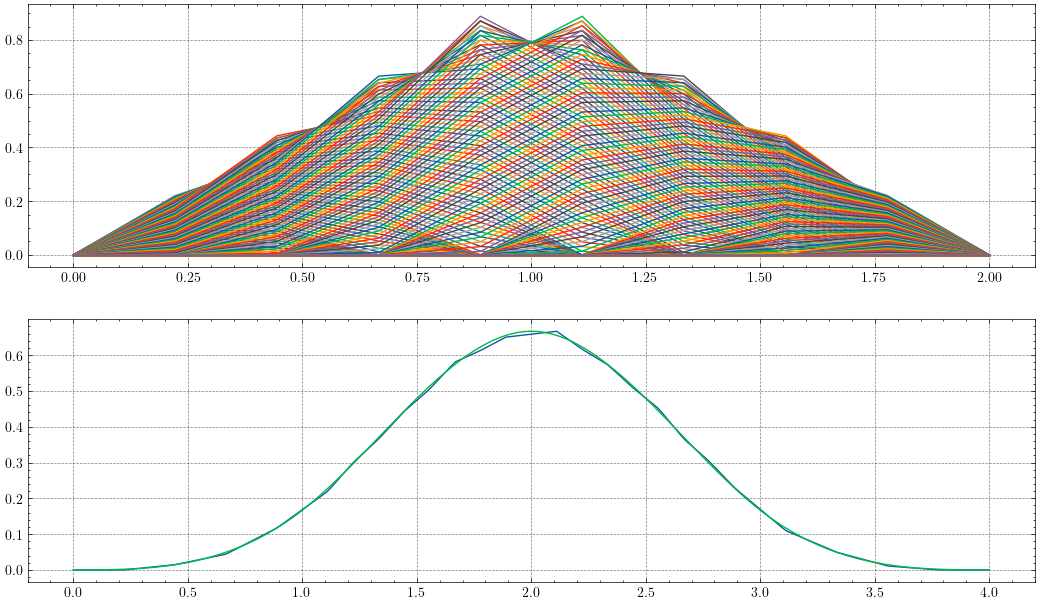

In [2]:
import sympy as smp
from sympy.abc import x, t, y
import numpy as np
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science',  'grid'])

f = smp.Piecewise((0, x<0), (x, x<=1), (2-x, x<=2),(0, True)) # triangular density distr

fig, axes = plt.subplots(2, 1, figsize=(13,7.5))

x_list = np.linspace(0, 2, 10)

def conv_ff(y):
    ff = f.subs(x,y-t)*f.subs(x,t)
    ff_lam = smp.lambdify(t, ff)
    ff_vals = ff_lam(x_list)

    axes[0].plot(x_list, ff_vals)

    integral_val = simpson(y=ff_vals, x=x_list)
    return integral_val


y_list = np.linspace(0, 4, 200)

conv_ff_vect = np.vectorize(conv_ff)
conv_vals = conv_ff_vect(y_list)
axes[1].plot(y_list, conv_vals) # plot convolution

conv_ff_symbolic = smp.Piecewise((0, y<0), (1/6*y**3, y<1), (-1/2*y**3+2*y**2-2*y+2/3, y<2),
                                 (-1/2*(4-y)**3+2*(4-y)**2-2*(4-y)+2/3, y<3), (1/6*(4-y)**3, y<4), (0, True))

conv_symb_lam = smp.lambdify(y, conv_ff_symbolic)
conv_symb_vals = conv_symb_lam(y_list)
axes[1].plot(y_list, conv_symb_vals) # plot symbolic convolution

Tripple integral

Problem 7. Probability

In [62]:
import sympy as smp
from sympy.abc import x, y, z

integ = smp.Integral(z**2, (z,0,3*x), (x, 0, smp.sqrt(4-y**2)), (y, -2, 2))
print(integ.doit())

integ = smp.Integral(z**2, (x,z/3,smp.sqrt(4-y**2)), (y, -smp.sqrt(4-(z/3)**2), smp.sqrt(4-(z/3)**2)), (z, 0, 6))
print(integ.doit())

384/5
384/5
